In [9]:
# Importing the neccessary libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import pandas as pd
import networkx as nx

import matplotlib as mpl

import random
import math

## Generating the circle

In [70]:
# Setting the parameters of the circle

t = np.array(range(0,int(round(2*math.pi, 3)*1000)))/1000
r = 1
a = 0
b = 0

# Creating a circle

x = r * np.array([math.cos(i) for i in t]) + a

y = r * np.array([math.sin(i) for i in t]) + b

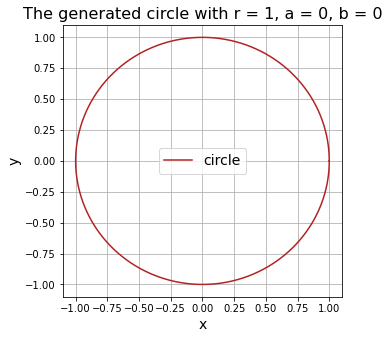

In [71]:
# Plotting the circle

plt.figure(figsize = (5,5))
plt.plot(x,y, color = 'firebrick', label = 'circle')

plt.title('The generated circle with r = ' + str(r) + ', a = ' + str(a) + ', b = ' + str(b), fontsize = 16)
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)

plt.legend(fontsize = 14)
plt.grid()
plt.show()

## Generating and adding nodes to the circle

In [133]:
# Setting the number of points to generate at first 

num_nodes_to_generate_first = 5

# Creating lists to save the generated coordinates

generated_coordinates = []

# Generating random numbers and placing them in the circle

for i in range(0,num_nodes_to_generate_first):

    #random index
    random_index = random.randint(0,len(x))

    #saving the generated coordinates into a dictionary
    temp = [x[random_index], y[random_index]]
    generated_coordinates.append((temp, (i+1), -999))

In [134]:
# Adding new nodes, calculating the distances and 

new_num_nodes_to_generate = 1000

# Generating random numbers and placing them in the circle

for i in range(0,new_num_nodes_to_generate):
    
    #random index
    random_index = random.randint(0,len(x))
    temp = [x[random_index], y[random_index]]
    
    #creating temp list for the thetas
    thetas_temp_list = []
    
    #measuring the distance between the new node and all the previous nodes
    for j in range(0,len(generated_coordinates)):
        dist = np.linalg.norm(np.array(generated_coordinates[j][0])-np.array(temp))
        
        #saving the theta values in a list
        thetas_temp_list.append((j+1)*math.asin(dist/(2*r))*2)
    
    #taking the min of angles and getting the closest node
    closest_node = thetas_temp_list.index(min(thetas_temp_list)) + 1
    
    #appending the new node to the generated coordinates
    generated_coordinates.append((temp, (num_nodes_to_generate_first + i + 1), closest_node))

## Plotting the results of the circle with nodes

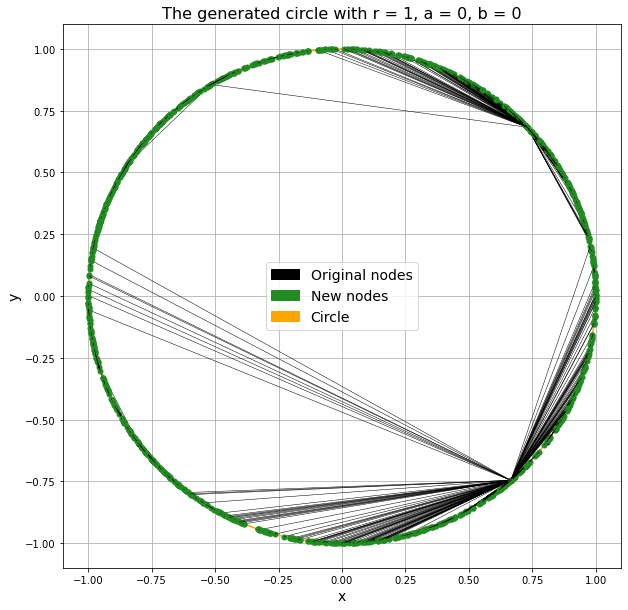

In [135]:
# Plotting the circle with the generated points

plt.figure(figsize = (10,10))

# Plotting the circle
plt.plot(x,y, color = 'orange')

# Plotting the original nodes
for i in range(0,num_nodes_to_generate_first):
    plt.plot(generated_coordinates[i][0][0], generated_coordinates[i][0][1], 'o', color = 'black', markersize = 5)
    
# Plotting the newly connected nodes
for i in range(num_nodes_to_generate_first, num_nodes_to_generate_first + new_num_nodes_to_generate):
    plt.plot(generated_coordinates[i][0][0], generated_coordinates[i][0][1], 'o', color = 'forestgreen', markersize = 5)
    plt.plot([generated_coordinates[i][0][0], generated_coordinates[generated_coordinates[i][2]-1][0][0]], [generated_coordinates[i][0][1], generated_coordinates[generated_coordinates[i][2]-1][0][1]], color = 'black', linewidth = 0.5)

# Setting the title and labels
plt.title('The generated circle with r = ' + str(r) + ', a = ' + str(a) + ', b = ' + str(b), fontsize = 16)
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)

# Setting the legend
orig_nodes_patch = mpatches.Patch(color='black', label='Original nodes')
new_nodes_patch = mpatches.Patch(color='forestgreen', label='New nodes')
circle_patch = mpatches.Patch(color='orange', label='Circle')
plt.legend(handles=[orig_nodes_patch, new_nodes_patch, circle_patch], fontsize = 14)

# Setting the grid
plt.grid()
plt.show()

## Generating a corresponding network

In [148]:
# Getting the nodes and edges from the generated data set

nodes = [generated_coordinates[i][1] for i in range(0,len(generated_coordinates))]
edges = [generated_coordinates[i][2] for i in range(5,len(generated_coordinates))]

In [149]:
edges

[2,
 6,
 1,
 7,
 5,
 6,
 6,
 9,
 6,
 2,
 1,
 7,
 1,
 5,
 2,
 10,
 1,
 12,
 1,
 1,
 1,
 17,
 2,
 7,
 1,
 1,
 22,
 1,
 2,
 10,
 2,
 29,
 4,
 24,
 21,
 2,
 8,
 19,
 13,
 2,
 5,
 28,
 35,
 27,
 2,
 7,
 12,
 1,
 1,
 1,
 2,
 5,
 1,
 6,
 1,
 5,
 1,
 5,
 1,
 10,
 1,
 16,
 51,
 65,
 2,
 2,
 57,
 5,
 32,
 2,
 33,
 1,
 74,
 9,
 8,
 9,
 11,
 5,
 21,
 29,
 2,
 6,
 1,
 1,
 29,
 60,
 43,
 1,
 1,
 15,
 9,
 1,
 11,
 1,
 32,
 2,
 6,
 49,
 2,
 12,
 2,
 1,
 56,
 28,
 4,
 2,
 64,
 1,
 41,
 48,
 25,
 5,
 87,
 15,
 49,
 105,
 29,
 4,
 2,
 53,
 3,
 108,
 2,
 53,
 2,
 2,
 6,
 29,
 1,
 46,
 2,
 11,
 12,
 6,
 6,
 24,
 2,
 44,
 2,
 22,
 2,
 51,
 22,
 69,
 5,
 2,
 2,
 3,
 1,
 30,
 3,
 92,
 5,
 4,
 125,
 1,
 39,
 13,
 33,
 52,
 5,
 91,
 16,
 45,
 39,
 66,
 3,
 5,
 4,
 7,
 59,
 1,
 41,
 19,
 2,
 105,
 65,
 129,
 9,
 1,
 49,
 86,
 1,
 1,
 10,
 11,
 2,
 2,
 26,
 35,
 121,
 15,
 1,
 112,
 7,
 163,
 34,
 1,
 56,
 8,
 5,
 1,
 6,
 103,
 1,
 3,
 2,
 1,
 107,
 9,
 134,
 5,
 1,
 5,
 1,
 4,
 1,
 2,
 12,
 15,
 103,
 40,
 11,
 